In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import fractions

import sympy as sp
sp.init_printing()

In [2]:
def lcm_pyfunc(a,b): 
    if a is not None and b is not None:
        if a > 0 and b > 0:
            return np.abs(a * b) / fractions.gcd(a,b)
        else:
            return 0
    else:
        return a if a else b if b else 0

gcd = np.frompyfunc(fractions.gcd, 2, 1)
lcm = np.frompyfunc(lcm_pyfunc, 2, 1)

def gcd_arr(arr):
    gcd_val = None
    for x in arr:
        gcd_val = gcd(x, gcd_val)
    
    return gcd_val

def lcm_arr(arr):
    lcm_val = None
    for x in arr:
        lcm_val = lcm(x, lcm_val)
    
    return lcm_val

In [3]:
gcd(6, 3)

In [4]:
lcm(2, 3)

In [5]:
R = np.array([10, 4, 8])

M = 98

In [6]:
G = gcd(gcd_arr(R), M) # worst case feedback accuracy
print(G)

2


In [7]:
# N_i = lcm(R, M) / R
N_i = M / gcd(R, M)
print(N_i)

[49 49 49]


In [8]:
k_i = N_i * R / M
print(k_i)

[5 2 4]


In [9]:
N = lcm_arr(N_i)
print N

49


In [10]:
k = N * R / M
print(k)

[5 2 4]


In [23]:
X = np.array([0, 90, 0])

In [24]:
D = gcd(R, M)
print(D)

[2 2 2]


In [29]:
M_red = M / D
print(M_red)

print(gcd(X, D))
assert((gcd(X, D) == D).all())

X_red = X / D
print(X_red)

R_red = R / D
print(R_red)

[49 49 49]
[2 2 2]
[0 45 0]
[5 2 4]


In [30]:
lcm(R[1], M)

In [31]:
gcd(X[1], 196)

# Chinese remainder theory stuff

In [34]:
# Python 2.7
def chinese_remainder(n, a):
    sum = 0
    prod = reduce(lambda a, b: a*b, n)
 
    for n_i, a_i in zip(n, a):
        p = prod // n_i
        sum += a_i * mul_inv(p, n_i) * p
    return sum % prod

def mul_inv(a, b):
    b0 = b
    x0, x1 = 0, 1
    if b == 1: return 1
    while a > 1:
        q = a // b
        a, b = b, a%b
        x0, x1 = x1 - q * x0, x0
    if x1 < 0: x1 += b0
    return x1
 
if __name__ == '__main__':
    n = [3, 5, 7]
    a = [2, 3, 2]
    print chinese_remainder(n, a)

23


In [72]:
n = np.array([147, 735])
a = np.array([13, 9])

reductor = gcd_arr(n)

kM = chinese_remainder(n/reductor, a/reductor) * reductor
N = (kM - a[0]) / n[0]

print(kM, N)

(0, -1)


In [68]:
lcm(15,49)

In [222]:
A = 3
B = 15
M = 7*49
X = 3
Y = 0

r_A = gcd(A,M)
r_B = gcd(B,M)

X_r_f = float(X) / r_A
Y_r_f = float(Y) / r_B

print(Y_r_f, X_r_f)

X_r = int(np.round(X_r_f))
Y_r = int(np.round(Y_r_f))

print(X_r, Y_r)

(0.0, 3.0)
(3, 0)


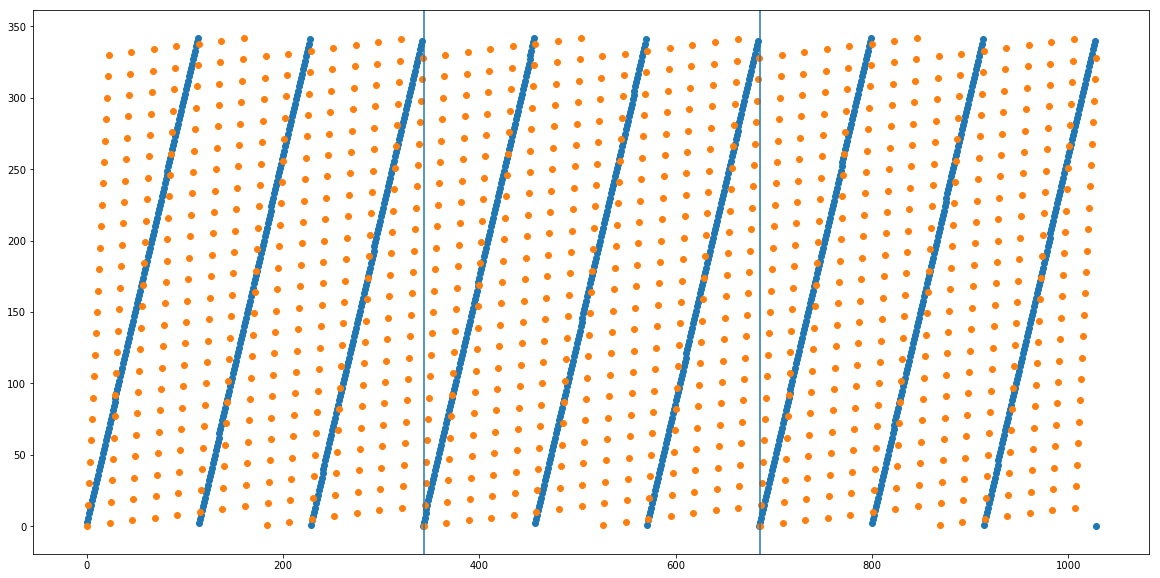

In [223]:
N = np.arange(3*M, dtype=np.int32)

Q_A = (X + N*A) % M
Q_B = (Y + N*B) % M

plt.figure(figsize=(20,10))
plt.scatter(N, Q_A)
plt.scatter(N, Q_B)

plt.axvline(x=M)
plt.axvline(x=2*M)

In [224]:
dist_A = np.copy(Q_A)
dist_A[Q_A > M / 2] = M-Q_A[Q_A > M / 2]

dist_B = np.copy(Q_B)
dist_B[Q_B > M / 2] = M-Q_B[Q_B > M / 2]

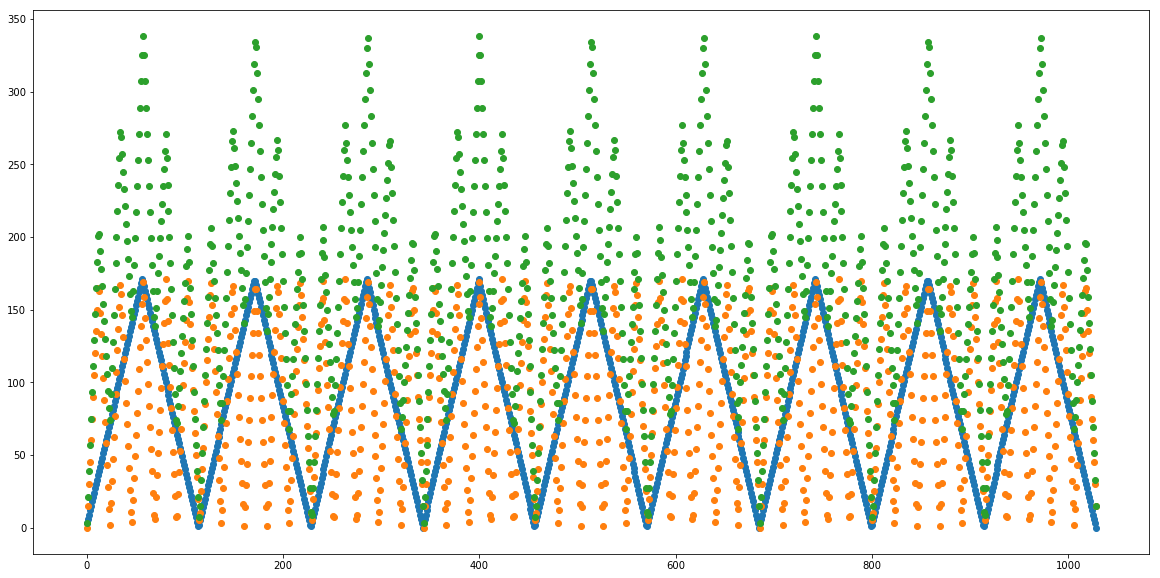

In [225]:
plt.figure(figsize=(20,10))

plt.scatter(N, dist_A)
plt.scatter(N, dist_B)

dist_AB = dist_A + dist_B
plt.scatter(N, dist_AB)

In [226]:
np.min(dist_AB) / float(M)